## Introduction to Pandas, Numpy, and Matplotlib + Seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('transactions.csv')
print(df.head())
print("=" * 50)
print(df.describe())


   TransactionID Customer   Amount     Category  IsFraud  DiscountedAmount
0              1    Alice    75.95    Groceries        0             46.15
1              2      Bob  1333.98  Electronics        1            963.56
2              3  Charlie    93.37    Groceries        0             73.43
3              4    David   514.97      Jewelry        1           1265.56
4              5      Eve   109.01     Clothing        0             83.55
       TransactionID       Amount    IsFraud  DiscountedAmount
count       10.00000    10.000000  10.000000         10.000000
mean         5.50000   416.764000   0.400000        428.023000
std          3.02765   478.391465   0.516398        491.789563
min          1.00000    75.950000   0.000000         30.550000
25%          3.25000    85.595000   0.000000         68.817500
50%          5.50000   101.190000   0.000000         83.145000
75%          7.75000   633.155000   1.000000        887.177500
max         10.00000  1333.980000   1.000000  

## Loading and Exploring Data

In [4]:
# Preview the first few rows
print(df.head())

# View shape of the dataset (rows, columns)
print("\nShape of the dataset:")
print(df.shape)

# See column names
print("\nColumns in the dataset:")
print(df.columns)

# General information about the dataset (data types, non-null values)
print("\nDataset Info:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary statistics:")
print(df.describe())

## print the first three elements
print(df.head(3))

   TransactionID Customer   Amount     Category  IsFraud  DiscountedAmount
0              1    Alice    75.95    Groceries        0             46.15
1              2      Bob  1333.98  Electronics        1            963.56
2              3  Charlie    93.37    Groceries        0             73.43
3              4    David   514.97      Jewelry        1           1265.56
4              5      Eve   109.01     Clothing        0             83.55

Shape of the dataset:
(10, 6)

Columns in the dataset:
Index(['TransactionID', 'Customer', 'Amount', 'Category', 'IsFraud',
       'DiscountedAmount'],
      dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TransactionID     10 non-null     int64  
 1   Customer          10 non-null     object 
 2   Amount            10 non-null     float64
 3   Category          1

## Filtering

In [7]:
high_value_transactions = df[df['Amount'] > 100]
print(high_value_transactions)

fraudulent_transactions = df[df['IsFraud'] == 1]
print("\n Fraud: ", fraudulent_transactions)

non_fraudulent_transactions = df[df['IsFraud'] == 0]
print("\n Not Fraud: ", non_fraudulent_transactions)

   TransactionID Customer   Amount     Category  IsFraud  DiscountedAmount
1              2      Bob  1333.98  Electronics        1            963.56
3              4    David   514.97      Jewelry        1           1265.56
4              5      Eve   109.01     Clothing        0             83.55
7              8    Heidi  1119.19  Electronics        1            658.03
9             10     Judy   672.55  Electronics        1           1009.38

 Fraud:     TransactionID Customer   Amount     Category  IsFraud  DiscountedAmount
1              2      Bob  1333.98  Electronics        1            963.56
3              4    David   514.97      Jewelry        1           1265.56
7              8    Heidi  1119.19  Electronics        1            658.03
9             10     Judy   672.55  Electronics        1           1009.38

 Not Fraud:     TransactionID Customer  Amount   Category  IsFraud  DiscountedAmount
0              1    Alice   75.95  Groceries        0             46.15
2      

## Sorting Data

In [8]:
sorted_by_amount = df.sort_values('Amount', ascending=False) # default at True
print(sorted_by_amount)

   TransactionID Customer   Amount     Category  IsFraud  DiscountedAmount
1              2      Bob  1333.98  Electronics        1            963.56
7              8    Heidi  1119.19  Electronics        1            658.03
9             10     Judy   672.55  Electronics        1           1009.38
3              4    David   514.97      Jewelry        1           1265.56
4              5      Eve   109.01     Clothing        0             83.55
2              3  Charlie    93.37    Groceries        0             73.43
6              7    Grace    87.32     Clothing        0             82.74
8              9     Ivan    85.02    Groceries        0             30.55
5              6    Frank    76.28    Groceries        0             67.28
0              1    Alice    75.95    Groceries        0             46.15


## Modifying Data
Modifying data 

In [10]:
# Creating a new column:
df['DiscountedAmount'] = df['Amount'].apply(lambda x: round(x * 0.9, 2) if x > 100 else round(x, 2))
df.to_csv('transactions.csv', index=False)
print(df.head())

   TransactionID Customer   Amount     Category  IsFraud  DiscountedAmount
0              1    Alice    46.15    Groceries        0             46.15
1              2      Bob  1070.62  Electronics        1            963.56
2              3  Charlie    73.43    Groceries        0             73.43
3              4    David  1406.18      Jewelry        1           1265.56
4              5      Eve    83.55     Clothing        0             83.55


## Grouping and Aggregating Data

In [ ]:
# Group by Customer and Find Total Spent
total_spent = df.groupby('Customer')['Amount'].sum()
print(total_spent)

# Group by Fraud Status and Get the Count of Transactions
fraud_count = df.groupby('IsFraud')['TransactionID'].count()
print(fraud_count)

## Checking for Missing Values

In [9]:
missing_values = df.isnull().sum()
print(missing_values)

TransactionID    0
Customer         0
Amount           0
Category         0
IsFraud          0
dtype: int64


## Fill Missing Values & Saving the Modified Data in the CSV File
`.apply()`

axis=0: Applies the function to each column. 

axis=1: Applies the function to each row.

In [ ]:
# Re-generate the values of category
category_ranges = {
    "Groceries": (10, 100),
    "Clothing": (20, 150),
    "Electronics": (100, 1500),
    "Jewelry": (500, 3000)
}

def generate_amount(row_name):
    low, high = category_ranges[row_name["Category"]]
    return round(np.random.uniform(low, high), 2)

df["Amount"] = df.apply(generate_amount, axis=1)

# Filling missing values of column amount with its mean.
df["Amount"] = df["Amount"].fillna(df["Amount"].mean())

# Saving the modified data in the CSV File
df.to_csv('transactions.csv', index=False)
print(df.describe())
print(df.head(10))

## Grouping, Aggregating, and Filtering Data

In [9]:
# Group by the 'Category' column
category_summary = df.groupby("Category").agg({
    "Amount": ["sum", "mean", "count"],
    "IsFraud": "sum"
}).reset_index()

# Rename columns for clarity
category_summary.columns = ["Category", "TotalSpent", "AverageSpent", "TransactionCount", "FraudCount"]

# Sort by total spending (optional)
category_summary = category_summary.sort_values(by="TotalSpent", ascending=False)

# Show the summary
print(category_summary)

      Category  TotalSpent  AverageSpent  TransactionCount  FraudCount
1  Electronics     3125.72   1041.906667                 3           3
3      Jewelry      514.97    514.970000                 1           1
2    Groceries      330.62     82.655000                 4           0
0     Clothing      196.33     98.165000                 2           0


## Plotting using Matplotlib

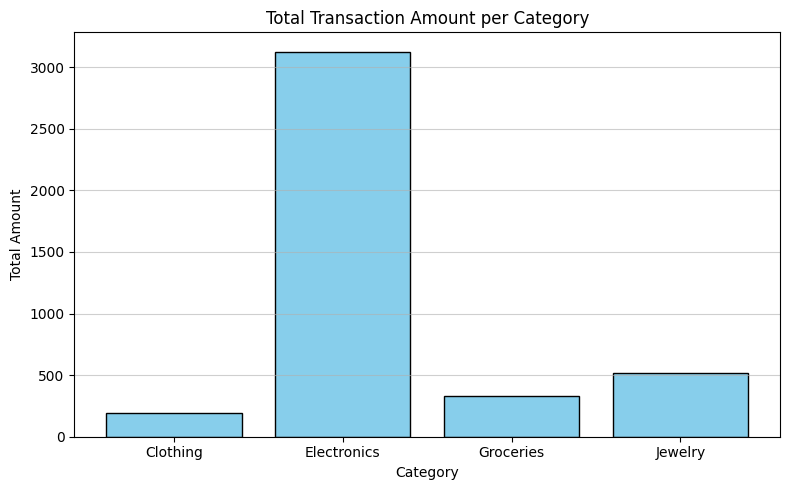

In [21]:
grouped = df.groupby("Category")["Amount"].sum().reset_index()

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(grouped["Category"], grouped["Amount"], color="skyblue", edgecolor="black")
plt.title("Total Transaction Amount per Category")
plt.xlabel("Category")
plt.ylabel("Total Amount")
plt.grid(axis="y", alpha=0.6)
plt.tight_layout()
plt.show()